The project I have identified for Capstone relates to UN voting records.  I'm interested in how countries can be grouped into voting blocks based on their voting record corresponding to resolutions raised in the General Assembly (not to be confused with General Assembly the education institution).  Once a grouping structure is defined based on voting using clustering I seek to understand what factors lead to these groupings.

Potential variables I've considered include: gross bilateral trade, government type, language(s) spoken, religoin(s), military allience/cooperation.

Additionally I would like to be able to use the information derived to build a time-series analysis to describe how these groupings and relationships have changed over time (1948 - 2017).

I've identified several useful data sources but there are certainly issues. 

My most important data set is the voting records of each country for each resolution.  I have this data, but as you will see from the data below, I'm not able to read everything in, both because I have issues importing one of the .tab files and because several of the files are in 'R' 

Risks:
- Not being able to extract from R
- Not being able to properly merge data files
- Not able to find acquire and merge additional variable data such as bilateral trade
- Model does not work


# Initial EDA on Raw UNGA dataset

Data set is taken from here: https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/12379

In [65]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [66]:
df_votes = pd.read_csv('~/Desktop/dataverse_files/UNVotes1-72.tab',sep='\t')
# This is a long list of vote tallies by resolution

In [67]:
df_votes.head(3)
# This is what the dataset looks like. {rcid: resolution ID, ccode: Country Code, 
# session: Count of Assemblies from 1946, member: Country member code, vote: desicion on resolution
# .....rest is obvious}

# vote – Vote choice
# 1 – Yes
# 2 – Abstain
# 3 – No
# 8 – Absent
# 9 – Not a member

,rcid,ccode,session,member,vote,Country,Countryname,year
0,3.0,2,1.0,1.0,1,USA,United States of America,1946
1,3.0,20,1.0,1.0,3,CAN,Canada,1946
2,3.0,31,1.0,NaN,9,BHS,Bahamas,1946


In [68]:
df_votes.shape
# 1,099,156  > 1M rows.

(1099156, 8)

In [69]:
df_votes.dtypes 
# All seem to be in useable format. 

rcid           float64
ccode            int64
session        float64
member         float64
vote             int64
Country         object
Countryname     object
year             int64
dtype: object

In [84]:
df_votes.info()
# Indicates there are a huge number
print("Number of missing values in 'member':" +str(1098964-846858))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099156 entries, 0 to 1099155
Data columns (total 8 columns):
rcid           1099156 non-null float64
ccode          1099156 non-null int64
session        1098964 non-null float64
member         846858 non-null float64
vote           1099156 non-null int64
Country        1091797 non-null object
Countryname    1098987 non-null object
year           1099156 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 67.1+ MB
Number of missing values in 'member':252106


In [71]:
df_votes.describe(include=['object'])
# This suggests to me countries may have been renamed and kept the same country code.
# Requires further inquiry

,Country,Countryname
count,1091797,1098987
unique,198,200
top,UZB,Timor-Leste
freq,5598,5598


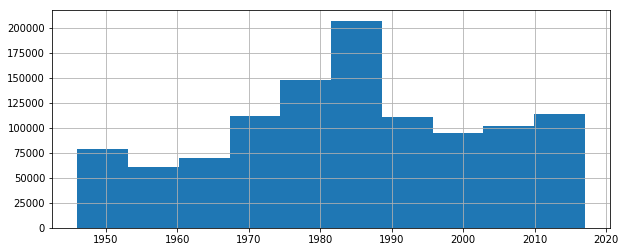

In [82]:
df_votes.year.hist(figsize=(10,4));
# looks like voting peaked in the 60's, meaning unclear

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b037860>]], dtype=object)

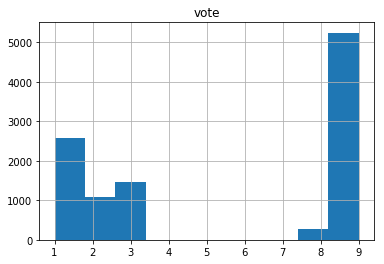

In [102]:
df_votes[df_votes.year == 1960][['vote','Country']].hist()
# This appears to show that: 1. There are more non-member votes than member votes in 1960
# resolution 'present' most likely.  There are a low number 8's for 'absent'.  These should
# be dropped, as an absense is usually due to a structural problem such as a civil war or 
# financial crisis.
# 

In [96]:
df_votes.session.value_counts(normalize=False, sort=True, 
                              ascending=True, bins=None, dropna=True)

19.0      197
6.0      4925
8.0      5122
9.0      6107
18.0     6304
13.0     6501
12.0     6698
10.0     7289
2.0      7486
20.0     8077
1.0      8471
24.0     8668
17.0     9062
7.0      9653
23.0    10047
5.0     10441
21.0    10441
14.0    10638
22.0    11229
53.0    12017
68.0    12352
66.0    12545
4.0     12608
48.0    12805
65.0    12931
67.0    13124
55.0    13199
56.0    13199
11.0    13199
25.0    13199
        ...  
62.0    14861
51.0    14972
16.0    14972
58.0    14972
29.0    14972
71.0    14982
69.0    15633
50.0    15957
61.0    16791
45.0    16942
72.0    17369
31.0    17533
28.0    18518
32.0    19306
35.0    20291
15.0    20488
3.0     20488
27.0    21473
44.0    22852
34.0    24231
26.0    24822
33.0    26004
36.0    26398
43.0    26792
42.0    28762
38.0    29353
39.0    29747
40.0    30535
41.0    30535
37.0    31520
Name: session, Length: 72, dtype: int64

In [ ]:
# users[users.age == 20]
#
# Select one column from the filtered results.
# users[users.age < 20].occupation
# users[users.age < 20].occupation.value_counts()
# users[(users.age < 20) & (users.gender=='M')]
# users[users.occupation.isin(['doctor', 'lawyer'])]

In [43]:
pd.merge(df_votes, df_descriptions, on='rcid')

,rcid,ccode,session_x,member,vote,Country,Countryname,year_x,Unnamed: 0,session_y,...,para,short,descr,me,nu,di,hr,co,ec,year_y
0,3,2,1.0,1.0,1,USA,United States of America,1946,1,1,...,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,1946
1,3,20,1.0,1.0,3,CAN,Canada,1946,1,1,...,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,1946
2,3,31,1.0,NaN,9,BHS,Bahamas,1946,1,1,...,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,1946
3,3,40,1.0,1.0,1,CUB,Cuba,1946,1,1,...,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,1946
4,3,41,1.0,1.0,1,HTI,Haiti,1946,1,1,...,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,1946
5,3,42,1.0,1.0,1,DOM,Dominican Republic,1946,1,1,...,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,1946
6,3,51,1.0,NaN,9,JAM,Jamaica,1946,1,1,...,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,1946
7,3,52,1.0,NaN,9,TTO,Trinidad and Tobago,1946,1,1,...,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,1946
8,3,53,1.0,NaN,9,BRB,Barbados,1946,1,1,...,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,1946
9,3,54,1.0,NaN,9,DMA,Dominica,1946,1,1,...,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,1946


In [30]:
df_points = pd.read_csv('~/Desktop/dataverse_files/IdealpointsPublished.tab',sep='\t')
# df points is Ideal point data. Unit of analysis is the country-session 
# (which corresponds closely but not perfectly, to country-year). This 
# contains country-specific ideal point estimates. 

In [31]:
df_points.columns

Index(['year', 'ccode', 'CountryAbb', 'session', 'N_full', 'CountryName',
       'PctAgreeUS', 'PctAgreeRUSSIA', 'PctAgreeBrazil', 'PctAgreeChina',
       'PctAgreeIndia', 'PctAgreeIsrael', 'yObs1', 'yObs2', 'yObs3',
       'Idealpoint', 'bornyear', 'g77', 'unsc_region'],
      dtype='object')

In [32]:
df_dyadic = pd.read_csv('~/Desktop/dataverse_files/Dyadicdata.tab',sep='\t')

In [33]:
df_dyadic.columns
# Dyadid affinity and ideal point data. Unit of analysis is the dyad-session (year). 
# This file contains distances between country ideal points as well as Affinity scores 
# (although we recommend against using these). 

Index(['ccode2', 'ccode1', 'year', 'ideal1', 'ideal2', 'absidealdiff', 's2un',
       's3un', 'agree2un', 'agree3un', 'jointvotes2', 'jointvotes3',
       'interpolated', 's2unimportant', 's3unimportant', 'agree2unimportant',
       'agree3unimportant', 'jointvotes2important', 'jointvotes3important',
       'IdealPointImportant1', 'IdealPointImportant2',
       'absidealimportantdiff'],
      dtype='object')

In [34]:
df_descriptions = pd.read_csv('~/documents/UN-Capstone/Dscription.csv')

In [35]:
df_descriptions.tail(30)

,Unnamed: 0,session,rcid,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,year
5572,5573,72,5609,17,167,0,0,2017-12-04,A/RES/72/53,NaN,NaN,Implementation of the Convention on the Prohib...,A/72/251 99m - Implementation of the Conventio...,0,0,1,0,0,0,2017
5573,5574,72,5610,46,132,3,0,2017-12-04,A/RES/72/21,NaN,NaN,Implementation of the Declaration of the India...,A/72/251 91 - Implementation of the Declaratio...,0,0,0,0,0,0,2017
5574,5575,72,5611,2,184,1,0,2017-12-04,A/RES/72/35,NaN,NaN,Conventional arms control at the regional and ...,A/72/251 99g - Conventional arms control at th...,0,0,1,0,0,0,2017
5575,5576,72,5612,0,180,3,0,2017-12-04,A/RES/72/23,NaN,NaN,Prohibition of the development and manufacture...,A/72/251 93 - Prohibition of the development a...,0,0,1,0,0,1,2017
5576,5577,72,5613,15,130,36,0,2017-12-04,A/RES/72/37,NaN,NaN,Ethical imperatives for a nuclear-weapon-free ...,A/72/251 99gg - Ethical imperatives for a nucl...,0,1,0,0,0,0,2017
5577,5578,72,5614,3,182,0,0,2017-12-04,A/RES/72/26,NaN,NaN,Prevention of an arms race in outer space : re...,A/72/251 97a - Prevention of an arms race in o...,0,0,1,0,0,0,2017
5578,5579,72,5615,11,173,1,1,2017-12-04,A/RES/72/32,NaN,NaN,"Compliance with non-proliferation, arms limita...",A/72/251 99aa - Compliance with non-proliferat...,0,1,1,0,0,0,2017
5579,5580,72,5616,48,131,4,0,2017-12-04,A/RES/72/27,NaN,NaN,No first placement of weapons in outer space :...,A/72/251 97b - No first placement of weapons i...,0,0,1,0,0,0,2017
5580,5581,72,5617,14,125,39,1,2017-12-04,A/RES/72/31,NaN,NaN,Taking forward multilateral nuclear disarmamen...,A/72/251 99bb - Taking forward multilateral nu...,0,1,1,0,0,0,2017
5581,5582,72,5618,62,125,0,0,2017-12-04,A/RES/72/25,NaN,NaN,Conclusion of effective international arrangem...,A/72/251 96 - Conclusion of effective internat...,0,1,1,0,0,0,2017


In [36]:
df_descriptions.head()

,Unnamed: 0,session,rcid,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,year
0,1,1,3,4,29,18,0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,1946
1,2,1,4,8,9,34,0,1946-01-02,R/1/79,0.0,0.0,SECURITY COUNCIL ELECTIONS,TO ADOPT A USSR PROPOSAL ADJOURNING DEBATE ON ...,0,0,0,0,0,0,1946
2,3,1,5,1,28,22,0,1946-01-04,R/1/98,0.0,0.0,VOTING PROCEDURE,TO ADOPT THE KOREAN PROPOSAL THAT INVALID BALL...,0,0,0,0,0,0,1946
3,4,1,6,10,12,27,0,1946-01-04,R/1/107,0.0,0.0,DECLARATION OF HUMAN RIGHTS,TO ADOPT A CUBAN PROPOSAL (A/3-C) THAT AN ITEM...,0,0,0,1,0,0,1946
4,5,1,7,0,25,18,0,1946-01-02,R/1/295,1.0,0.0,GENERAL ASSEMBLY ELECTIONS,TO ADOPT A 6TH COMMITTEE AMENDMENT (A/14) TO T...,0,0,0,0,0,0,1946


In [39]:
df_UNAid = pd.read_csv('~/documents/UN-Capstone/net_aid.csv')

In [40]:
df_UNAid

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,4.823290e+09,NaN
1,Afghanistan,2013,5.262380e+09,NaN
2,Afghanistan,2012,6.666890e+09,NaN
3,Afghanistan,2011,6.865890e+09,NaN
4,Afghanistan,2010,6.471940e+09,NaN
5,Afghanistan,2009,6.235400e+09,NaN
6,Afghanistan,2008,4.875670e+09,NaN
7,Afghanistan,2007,4.964720e+09,NaN
8,Afghanistan,2006,2.961670e+09,NaN
9,Afghanistan,2005,2.837620e+09,NaN
